# 1. Global Earthquakes

In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude.

In [61]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#select data and check
ds = pd.read_csv('usgs_earthquakes.csv')
aim = ds.sort_values(by='mag', ascending=False).head(50)
aim = aim.reset_index(drop=True)
aim

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
1,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
3,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
4,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
5,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
6,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
7,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
8,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
9,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


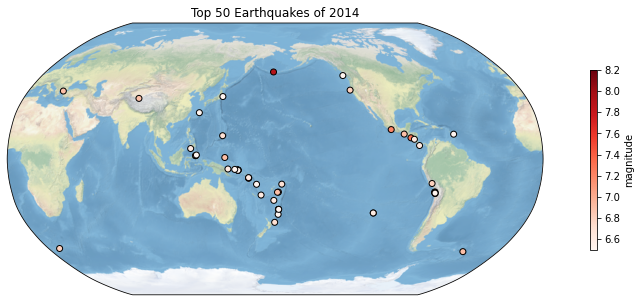

In [3]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180, globe=None))
ax.set_global()
ax.stock_img()

ax.set_title('Top 50 Earthquakes of 2014')
eqs = plt.scatter(aim['longitude'].values, aim['latitude'].values, marker='o', c=aim['mag'], cmap='Reds', edgecolors='k', transform=ccrs.PlateCarree())
colorbar = fig.colorbar(eqs, cax=fig.add_axes([0.95,0.25,0.01,0.5]),shrink=0.7)
colorbar.set_label('magnitude')
plt.savefig('Top 50 Earthquakes of 2014.png',bbox_inches='tight')
plt.show()

## 2. Explore a netCDF dataset

2.1 Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box.

In [47]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine='netcdf4')
ds

In [ ]:
sw1_mean=np.mean(sw1,axis=0)

No handles with labels found to put in legend.


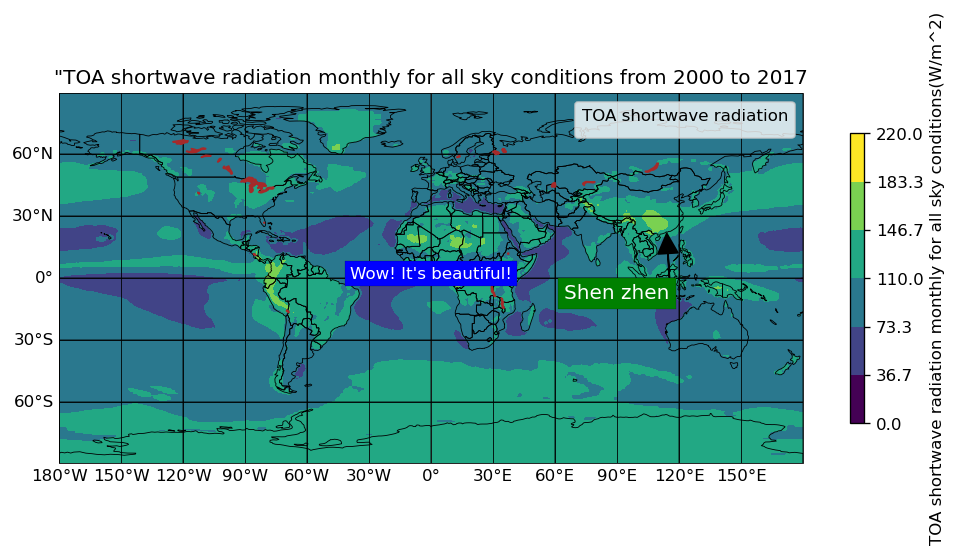

In [134]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,8), dpi=120)

# Create an axes with Orthographic projection style
proj = ccrs.PlateCarree() 
ax = plt.axes(projection=proj)
sw1_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), vmin=0, vmax=220,cbar_kwargs={'shrink': 0.4,'label':"TOA shortwave radiation monthly for all sky conditions(W/m^2)"})

#Legend
plt.legend(title='TOA shortwave radiation', loc='best')

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

#feature
ax.add_feature(cfeature.LAKES, edgecolor='brown', facecolor='brown', zorder=2)

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)

#annotate
plt.annotate('Shen zhen', xy=(114,22), xytext=(90, -10),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# text
plt.text(0,0,"Wow! It's beautiful!", transform=plt.gca().transData, horizontalalignment='center', color='white',
         bbox=dict(boxstyle='square', fc='blue', linewidth=0.1))

#Title
ax.set_title('"TOA shortwave radiation monthly for all sky conditions from 2000 to 2017')

# x label and y label
plt.xlabel('Longitude')
plt.ylabel('Latitude')


#adjust labels and ticks
gl=ax.gridlines(draw_labels=True,linestyle="-",linewidth=0.5,color='k')
gl.top_labels=False #关闭上部经纬标签                                  
gl.right_labels=False
gl.xformatter = LONGITUDE_FORMATTER  #使横坐标转化为经纬度格式            
gl.yformatter = LATITUDE_FORMATTER                                        
gl.xlocator=mticker.FixedLocator(np.arange(-180,180,30))      
gl.ylocator=mticker.FixedLocator(np.arange(-90,90,30)) 
gl.xlabel_style={'size':10}#修改经纬度字体大小                             
gl.ylabel_style={'size':10}
ax.spines['geo'].set_linewidth(0.5)#调节边框粗细

plt.show()

2.2 Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box.

In [124]:
ds = xr.open_dataset("wind_ITPCAS-CMFD_V0106_B-01_01dy_010deg_201601-201612.nc", engine='netcdf4')
temp=ds['wind']

<xarray.DataArray 'wind' ()>
array(24.68199921)

No handles with labels found to put in legend.


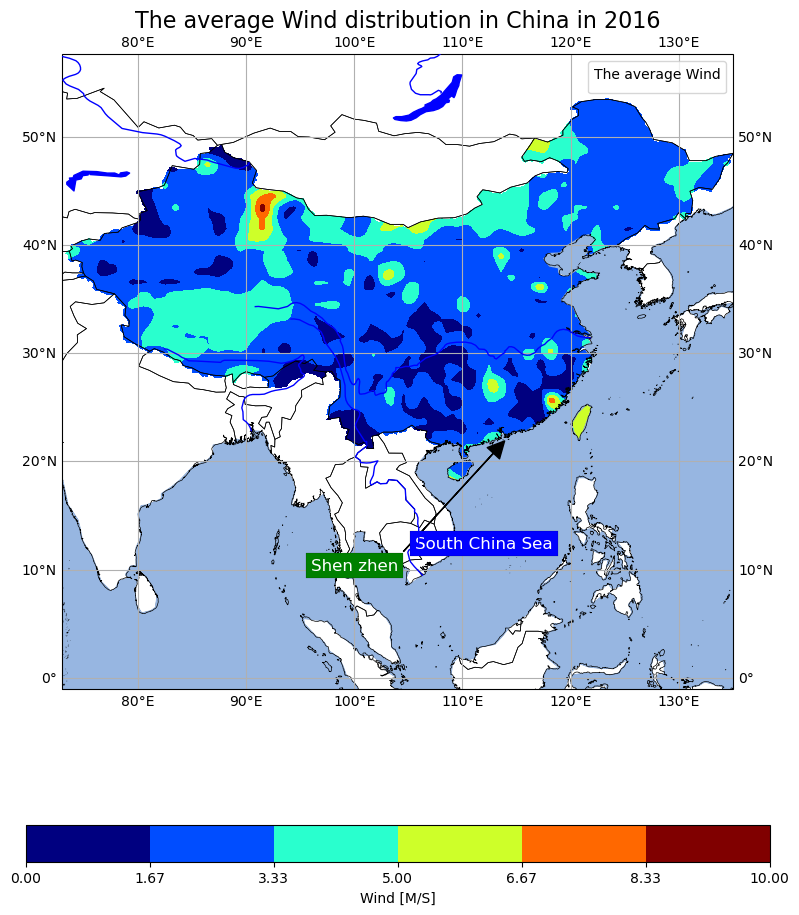

In [142]:
#Calculate the mean of wind
temp_mean=np.mean(temp,axis=0)

# Create and define the size of a figure object 
plt.figure(figsize=(12,12), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 108.0, 34.0 
proj1 = ccrs.PlateCarree()

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj1)
temp_mean.plot.contourf(ax=ax, cmap='jet',transform=ccrs.PlateCarree(), vmin=0, vmax=10,cbar_kwargs={'orientation': 'horizontal'
,'shrink': 0.8,'label':'Wind [M/S]'})

# Set a region and plot
extent = [central_lon-35, central_lon+27, central_lat-35, central_lat+20]
ax.set_extent(extent)


# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, zorder=1)

# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
ax.gridlines(draw_labels=True)
plt.tick_params(labelsize=30)

# legend
plt.legend(title='The average Wind',loc='best')   

# annotate
plt.annotate('Shen zhen', xy=(114,22), xytext=(100, 10),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
# text
plt.text(112,12,"South China Sea", transform=plt.gca().transData, horizontalalignment='center', color='white',
        bbox=dict(boxstyle='square', fc='blue', linewidth=0.1),fontsize=12)

#The title
plt.title("The average Wind distribution in China in 2016",fontsize=16)

plt.show()

## Instruction：

1. Zelin MAI inspired me how to make scatterplot.
2. Yunqiu ZHOU inspired me how to add text box and annotate.
                                                      Thanks them so much!